In [1]:
import os, sys
sys.path.insert(0, "/home/image/ohs/Det3D")

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [3]:
import nuscenes
from nuscenes.nuscenes import NuScenes

In [4]:
nusc = NuScenes(version='v1.0-trainval', dataroot='/mnt/atgpool01/NuScenes/v1.0-trainval', verbose=True)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 44.2 seconds.
Reverse indexing ...
Done reverse indexing in 13.9 seconds.


In [5]:
print(dir(nusc))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__load_table__', '__lt__', '__make_reverse_index__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_token2ind', 'attribute', 'box_velocity', 'calibrated_sensor', 'category', 'dataroot', 'ego_pose', 'explorer', 'field2token', 'get', 'get_box', 'get_boxes', 'get_sample_data', 'get_sample_data_path', 'getind', 'instance', 'list_attributes', 'list_categories', 'list_sample', 'list_scenes', 'log', 'map', 'render_annotation', 'render_egoposes_on_map', 'render_instance', 'render_pointcloud_in_image', 'render_sample', 'render_sample_data', 'render_scene', 'render_scene_channel', 'sample', 'sample_annotation', 'sample_data', 'scene', 'sensor', 'table_names', 'table_root', 'version', 'visibility']


In [6]:
# nuScenes 的 annotations 以 table 的形式组织，每个 table 有自己的主键，还有指向其他 table 的外键
nusc.table_names

['category',
 'attribute',
 'visibility',
 'instance',
 'sensor',
 'calibrated_sensor',
 'ego_pose',
 'log',
 'scene',
 'sample',
 'sample_data',
 'sample_annotation',
 'map']

In [7]:
print(len(nusc.scene))
for i, scene in enumerate(nusc.scene):
    print(i, scene['description'])

850
0 Construction, maneuver between several trucks
1 Intersection, peds, waiting vehicle, parked motorcycle at parking lot
2 Parking lot, barrier, exit parking lot
3 Random scene, arrive at intersection, cross intersection, jaywalkers
4 Overtaken by taxi, construction site
5 Sitting construction worker, parked bicycle, ped walking along road, construction vehicle, worker sitting on back of van
6 Van overtaking us, peds, jaywalker, bicycle rack, turn left
7 Several moving pedestrians, parked cards and motorcycle
8 Peds crossing, parked cars, garbage, peds waiting
9 Parked motorcycle, person pickung up garbage, pass construction vehicles and entrance to construction site
10 Turn left, pass trucks on both sides, construction workers, sleeping construction workers, garbage, parked cars
11 Nature, bus stop, parked cars, bus exits from the intersection
12 Follow bus, parked cars, trash cans, parked bicycles, nature
13 Follow bus, cross intersection, nature
14 Narrow road, following bus, bus

In [8]:
for i in nusc.category:
    print(i['description'], '+++++++++++', i['name'])

Adult subcategory. +++++++++++ human.pedestrian.adult
Child subcategory. +++++++++++ human.pedestrian.child
Wheelchairs. If a person is in the wheelchair, include in the annotation. +++++++++++ human.pedestrian.wheelchair
Strollers. If a person is in the stroller, include in the annotation. +++++++++++ human.pedestrian.stroller
A small electric or self-propelled vehicle, e.g. skateboard, segway, or scooters, on which the person typically travels in a upright position. Driver and (if applicable) rider should be included in the bounding box along with the vehicle. +++++++++++ human.pedestrian.personal_mobility
Police officer. +++++++++++ human.pedestrian.police_officer
Construction worker +++++++++++ human.pedestrian.construction_worker
All animals, e.g. cats, rats, dogs, deer, birds. +++++++++++ animal
Vehicle designed primarily for personal use, e.g. sedans, hatch-backs, wagons, vans, mini-vans, SUVs and jeeps. If the vehicle is designed to carry more than 10 people use vehicle.bus. If

In [9]:
nusc.instance[0].keys()

dict_keys(['token', 'category_token', 'nbr_annotations', 'first_annotation_token', 'last_annotation_token'])

In [10]:
nusc.get('sample_annotation', nusc.instance[0]['first_annotation_token'])

{'token': '173a50411564442ab195e132472fde71',
 'sample_token': 'e93e98b63d3b40209056d129dc53ceee',
 'instance_token': '5e2b6fd1fab74d04a79eefebbec357bb',
 'visibility_token': '4',
 'attribute_tokens': [],
 'translation': [994.031, 612.51, 0.728],
 'size': [0.3, 0.291, 0.734],
 'rotation': [-0.04208490861058176, 0.0, 0.0, 0.9991140377690821],
 'prev': '',
 'next': '35034272eb1f413187ae7b6affb6ec7a',
 'num_lidar_pts': 2,
 'num_radar_pts': 0,
 'category_name': 'movable_object.trafficcone'}

In [11]:
nusc.visibility

[{'description': 'visibility of whole object is between 0 and 40%',
  'token': '1',
  'level': 'v0-40'},
 {'description': 'visibility of whole object is between 40 and 60%',
  'token': '2',
  'level': 'v40-60'},
 {'description': 'visibility of whole object is between 60 and 80%',
  'token': '3',
  'level': 'v60-80'},
 {'description': 'visibility of whole object is between 80 and 100%',
  'token': '4',
  'level': 'v80-100'}]

In [12]:
# translation and the rotation parameters are given with respect to the ego vehicle body frame.
print(len(nusc.sensor))
nusc.sensor

12


[{'token': '725903f5b62f56118f4094b46a4470d8',
  'channel': 'CAM_FRONT',
  'modality': 'camera'},
 {'token': 'ce89d4f3050b5892b33b3d328c5e82a3',
  'channel': 'CAM_BACK',
  'modality': 'camera'},
 {'token': 'a89643a5de885c6486df2232dc954da2',
  'channel': 'CAM_BACK_LEFT',
  'modality': 'camera'},
 {'token': 'ec4b5d41840a509984f7ec36419d4c09',
  'channel': 'CAM_FRONT_LEFT',
  'modality': 'camera'},
 {'token': '2f7ad058f1ac5557bf321c7543758f43',
  'channel': 'CAM_FRONT_RIGHT',
  'modality': 'camera'},
 {'token': 'ca7dba2ec9f95951bbe67246f7f2c3f7',
  'channel': 'CAM_BACK_RIGHT',
  'modality': 'camera'},
 {'token': 'dc8b396651c05aedbb9cdaae573bb567',
  'channel': 'LIDAR_TOP',
  'modality': 'lidar'},
 {'token': '47fcd48f71d75e0da5c8c1704a9bfe0a',
  'channel': 'RADAR_FRONT',
  'modality': 'radar'},
 {'token': '232a6c4dc628532e81de1c57120876e9',
  'channel': 'RADAR_FRONT_RIGHT',
  'modality': 'radar'},
 {'token': '1f69f87a4e175e5ba1d03e2e6d9bcd27',
  'channel': 'RADAR_FRONT_LEFT',
  'modality'

In [13]:
print(len(nusc.calibrated_sensor)) # 12 * 850 = 10200
nusc.calibrated_sensor[0].keys()

10200


dict_keys(['token', 'sensor_token', 'translation', 'rotation', 'camera_intrinsic'])

In [14]:
# ego_pose contains information about the location (encoded in translation) and the orientation (encoded in rotation) 
# of the ego vehicle body frame, with respect to the global coordinate system.
print(len(nusc.ego_pose), len(nusc.sample_data))
nusc.ego_pose[0].keys()

2631083 2631083


dict_keys(['token', 'timestamp', 'rotation', 'translation'])

In [15]:
print(len(nusc.log))
nusc.log[0]

68


{'token': '6b6513e6c8384cec88775cae30b78c0e',
 'logfile': 'n015-2018-07-18-11-07-57+0800',
 'vehicle': 'n015',
 'date_captured': '2018-07-18',
 'location': 'singapore-onenorth',
 'map_token': '53992ee3023e5494b90c316c183be829'}

In [16]:
print(len(nusc.map))
nusc.map[0]

4


{'category': 'semantic_prior',
 'token': '53992ee3023e5494b90c316c183be829',
 'filename': 'maps/53992ee3023e5494b90c316c183be829.png',
 'log_tokens': ['0986cb758b1d43fdaa051ab23d45582b',
  '1c9b302455ff44a9a290c372b31aa3ce',
  'e60234ec7c324789ac7c8441a5e49731',
  '46123a03f41e4657adc82ed9ddbe0ba2',
  'a5bb7f9dd1884f1ea0de299caefe7ef4',
  'bc41a49366734ebf978d6a71981537dc',
  'f8699afb7a2247e38549e4d250b4581b',
  'd0450edaed4a46f898403f45fa9e5f0d',
  'f38ef5a1e9c941aabb2155768670b92a',
  '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
  'ddc03471df3e4c9bb9663629a4097743',
  '31e9939f05c1485b88a8f68ad2cf9fa4',
  '783683d957054175bda1b326453a13f4',
  '343d984344e440c7952d1e403b572b2a',
  '92af2609d31445e5a71b2d895376fed6',
  '47620afea3c443f6a761e885273cb531',
  'd31dc715d1c34b99bd5afb0e3aea26ed',
  '34d0574ea8f340179c82162c6ac069bc',
  'd7fd2bb9696d43af901326664e42340b',
  'b5622d4dcb0d4549b813b3ffb96fbdc9',
  'da04ae0b72024818a6219d8dd138ea4b',
  '6b6513e6c8384cec88775cae30b78c0e',
  'eda311bda86f

In [17]:
len(nusc.sample) # 28130 + 6019

34149

In [18]:
sample = nusc.sample[20]
print(sample.keys())
print(sample['data'])
print(nusc.get('sample_data', sample['data']['LIDAR_TOP'])['is_key_frame'])
print(nusc.get('sample_data', nusc.get('sample', sample['next'])['data']['LIDAR_TOP'])['is_key_frame'])

dict_keys(['token', 'timestamp', 'prev', 'next', 'scene_token', 'data', 'anns'])
{'RADAR_FRONT': '516bfb53b8ca4eab8f0401471722932a', 'RADAR_FRONT_LEFT': 'ee90f17b44aa479d811006ca70f56180', 'RADAR_FRONT_RIGHT': '9a99ce3c845146bd93b80489e51291c2', 'RADAR_BACK_LEFT': 'f1f918b57e0b441c9a41a2e7d2b9b72d', 'RADAR_BACK_RIGHT': '5e21742e01484635bacb0b5de9f3dac2', 'LIDAR_TOP': '946b839480be46a3ae1ddcb359079f6d', 'CAM_FRONT': 'a59c061fc9b7488693b91d0bab13acf1', 'CAM_FRONT_RIGHT': '5a331ab3acfb420ebf3c7f7700690f68', 'CAM_BACK_RIGHT': '8fa9938924be4f9d9788e74eb0e51b59', 'CAM_BACK': 'c3dd2544a7624f6d80aba31be6b92226', 'CAM_BACK_LEFT': 'c792b2920d024582b4640f6447bb7a98', 'CAM_FRONT_LEFT': '3e8218fd5e23498b8b11d65d2d34f15a'}
True
True


In [19]:
print(len(nusc.sample_data)) # 2631083 / 34149
print(nusc.sample_data[0].keys())
len(nusc.field2token("sample_data", "sample_token", sample['token']))

2631083
dict_keys(['token', 'sample_token', 'ego_pose_token', 'calibrated_sensor_token', 'timestamp', 'fileformat', 'is_key_frame', 'height', 'width', 'filename', 'prev', 'next', 'sensor_modality', 'channel'])


80

In [20]:
print(help(nusc.list_sample))

Help on method list_sample in module nuscenes.nuscenes:

list_sample(sample_token: str) -> None method of nuscenes.nuscenes.NuScenes instance

None


In [21]:
nusc.list_attributes()

cycle.with_rider: 7331
cycle.without_rider: 17345
pedestrian.moving: 157444
pedestrian.sitting_lying_down: 13939
pedestrian.standing: 46530
vehicle.moving: 149203
vehicle.parked: 420226
vehicle.stopped: 65975


In [22]:
nusc.list_categories()

Category stats for split v1.0-trainval:
animal                      n=  787, width= 0.37±0.13, len= 0.86±0.36, height= 0.60±0.20, lw_aspect= 2.35±0.69
human.pedestrian.adult      n=208240, width= 0.67±0.13, len= 0.73±0.19, height= 1.77±0.18, lw_aspect= 1.11±0.26
human.pedestrian.child      n= 2066, width= 0.51±0.14, len= 0.53±0.15, height= 1.38±0.25, lw_aspect= 1.05±0.23
human.pedestrian.constructi n= 9161, width= 0.72±0.20, len= 0.71±0.20, height= 1.74±0.30, lw_aspect= 1.02±0.29
human.pedestrian.personal_m n=  395, width= 0.62±0.12, len= 1.18±0.31, height= 1.71±0.27, lw_aspect= 1.98±0.64
human.pedestrian.police_off n=  727, width= 0.73±0.14, len= 0.69±0.13, height= 1.83±0.14, lw_aspect= 0.97±0.18
human.pedestrian.stroller   n= 1072, width= 0.63±0.13, len= 0.95±0.27, height= 1.17±0.15, lw_aspect= 1.58±0.68
human.pedestrian.wheelchair n=  503, width= 0.77±0.10, len= 1.09±0.23, height= 1.37±0.09, lw_aspect= 1.42±0.23
movable_object.barrier      n=152087, width= 2.53±0.64, len= 0.50±0.17,

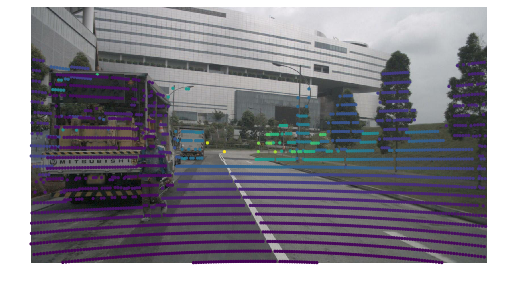

In [23]:
nusc.render_pointcloud_in_image(sample['token'], pointsensor_channel='LIDAR_TOP')

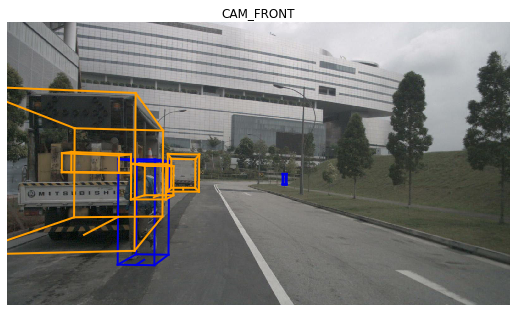

In [24]:
nusc.render_sample_data(sample['data']['CAM_FRONT'])

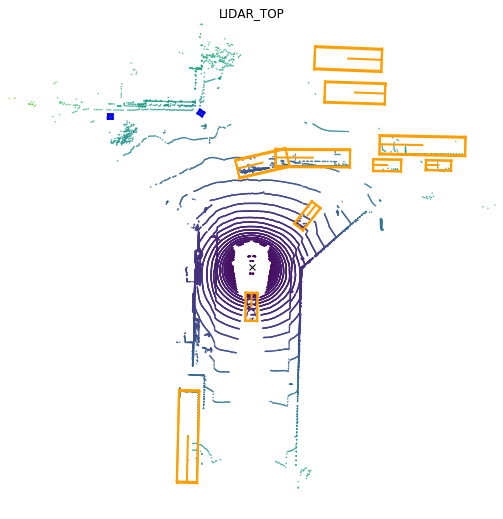

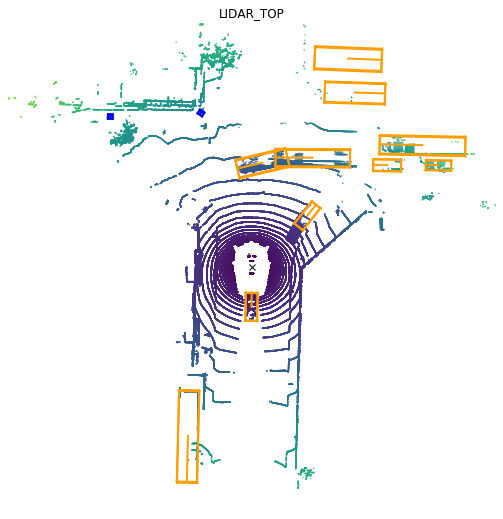

In [25]:
sample = nusc.get('sample', 'd5fec51f35dc444cb1752e74eb066097')
nusc.render_sample_data(sample['data']['LIDAR_TOP'], nsweeps=1)
nusc.render_sample_data(sample['data']['LIDAR_TOP'], nsweeps=10)

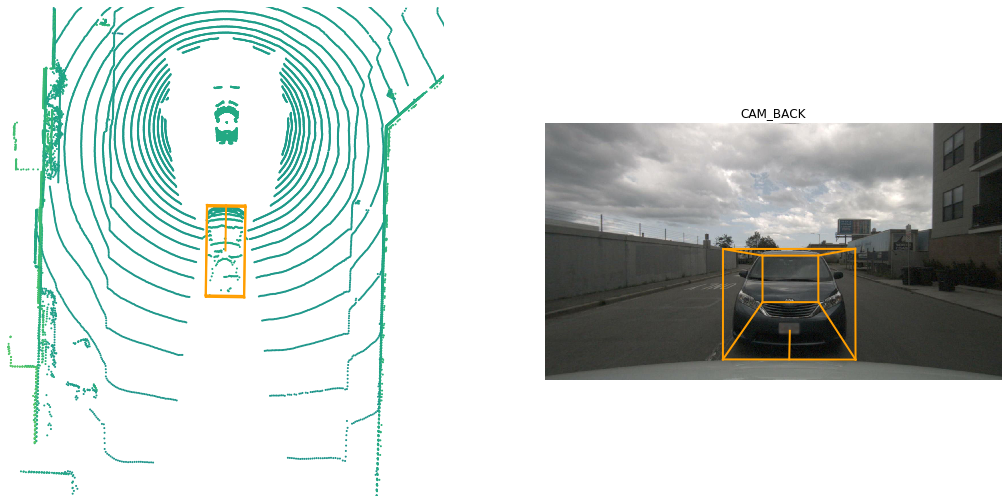

In [26]:
nusc.render_annotation(sample['anns'][13])

In [ ]:
nusc.render_scene_channel(nusc.scene[0]['token'], 'CAM_FRONT')

In [ ]:
nusc.render_egoposes_on_map(log_location='singapore-onenorth')

In [ ]:
anntoken = '9f450bf6b7454551bbbc9a4c6e74ef2e'
visibility_token = nusc.get('sample_annotation', anntoken)['visibility_token']

print("Visibility: {}".format(nusc.get('visibility', visibility_token)))
nusc.render_annotation(anntoken)

In [ ]:
# Map information is stored as binary semantic masks from a top-down view. 